#Задача 1

Оставил все по прежнему, датасет не добавлял, тк тут заданы четкие условия

1. Разработать программу решения производственной задачи. Цех может производить стулья и столы. На производство стула идет 5 единиц материала, на производство стола – 20 единиц. Для изготовления стула требуется 10 человеко-   часов, стола – 15 Имеется 400 единиц материала и 450 человеко-часов. Прибыль при производстве стула – 45 у.е., при производстве стола – 80 у.е. Сколько надо сделать стульев и столов, чтобы получить максимальную прибыль?

##с датасетом

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('lab1.csv')
dataset.head()

,Chairs,Tables,Material,Man-Hours,Profit
0,0,20,400,300,1600
1,1,19,395,295,1535
2,2,18,390,290,1480
3,3,17,385,285,1425
4,4,16,380,280,1370


In [41]:
import pandas as pd
import random

file_path = 'lab1.csv'
data = pd.read_csv(file_path)

materials = data['Material'].sum()
hours_ludi = data['Man-Hours'].sum()

# Настройки генетического алгоритма
population_size = 100
generations = 200

population = [(random.choice(data['Chairs']), random.choice(data['Tables'])) for _ in range(population_size)]

for _ in range(generations):
    population = sorted(population, key=lambda individual: (data[(data['Chairs'] == individual[0]) & (data['Tables'] == individual[1])]['Profit'].values[0] if not data[(data['Chairs'] == individual[0]) & (data['Tables'] == individual[1])].empty else 0), reverse=True)

    new_gen = population[:population_size // 2]

    while len(new_gen) < population_size:
        p1, p2 = random.sample(new_gen, 2)
        offspring = (p1[0], p2[1])
        if random.random() < 0.5:
            offspring = (max(0, offspring[0] + random.choice([-1, 1])), offspring[1])
        else:
            offspring = (offspring[0], max(0, offspring[1] + random.choice([-1, 1])))
        new_gen.append(offspring)

    population = new_gen

best_result = max(population, key=lambda individual: (data[(data['Chairs'] == individual[0]) & (data['Tables'] == individual[1])]['Profit'].values[0] if not data[(data['Chairs'] == individual[0]) & (data['Tables'] == individual[1])].empty else 0))

profit = data[(data['Chairs'] == best_result[0]) & (data['Tables'] == best_result[1])]['Profit'].values[0] if not data[(data['Chairs'] == best_result[0]) & (data['Tables'] == best_result[1])].empty else 0

print(f"Оптимальное решение: стулья = {best_result[0]}, столы = {best_result[1]}, Прибыль: {profit} у.е.")


Оптимальное решение: стулья = 0, столы = 20, Прибыль: 1600 у.е.


#Задача 2

2. Разработать программу решения задачи раскроя. Найти оптимальный вариант раскроя некоторого количества рулонов бумаги фиксированной ширины для различных заказчиков (которым нужны различные количества рулонов различной ширины), минимизировав при этом отходы.

##с датасетом

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('lab2.csv', sep=";")
dataset.head()

,Roll_Width,Client_ID,Order_Width,Order_Length,Quantity
0,100,1,40,100,10
1,100,2,30,200,15
2,100,3,50,150,5
3,100,4,60,80,20
4,100,5,10,300,8


In [8]:
import pandas as pd
from scipy.optimize import linprog

data = pd.read_csv('lab2.csv', sep=";")

subset_size = len(data) // 6
data = data.head(subset_size)

roll_width = data['Roll_Width'].iloc[0]
order_data = data[['Order_Width', 'Order_Length', 'Quantity']]
num_orders = len(order_data)

cut_combinations = []
for i in range(1, 1 << num_orders):
    total_width = 0
    combination = []

    for j in range(num_orders):
        if (i & (1 << j)) > 0:
            total_width += order_data['Order_Width'].iloc[j]
            combination.append(j)

    if total_width <= roll_width:
        cut_combinations.append(combination)

num_combinations = len(cut_combinations)
c = [1] * num_combinations

A_eq = []
b_eq = []

for j in range(num_orders):
    constraint = [0] * num_combinations
    for p in range(num_combinations):
        if j in cut_combinations[p]:
            constraint[p] += 1
    A_eq.append(constraint)
    b_eq.append(order_data['Quantity'].iloc[j])

A_eq = pd.DataFrame(A_eq).values
b_eq = pd.Series(b_eq).values
bounds = [(0, None)] * num_combinations

result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

if result.success:
    print("Оптимальное распределение рулонов:")
    for i in range(num_combinations):
        if result.x[i] > 0:
            print(f"Комбинация {cut_combinations[i]} используется {int(result.x[i])} раз(а)")
else:
    print("Не удалось найти оптимальное решение.")

minimal_waste = round(result.fun)
print(f"Минимальные отходы: {minimal_waste}")


Оптимальное распределение рулонов:
Комбинация [0, 3] используется 10 раз(а)
Комбинация [3, 4, 6] используется 7 раз(а)
Комбинация [1, 7] используется 9 раз(а)
Комбинация [2, 9] используется 2 раз(а)
Комбинация [3, 10] используется 2 раз(а)
Комбинация [4, 9, 10] используется 0 раз(а)
Комбинация [5, 11] используется 12 раз(а)
Комбинация [3, 4, 12] используется 0 раз(а)
Комбинация [1, 8, 12] используется 5 раз(а)
Комбинация [2, 13] используется 2 раз(а)
Комбинация [9, 13] используется 1 раз(а)
Комбинация [11, 14] используется 3 раз(а)
Комбинация [1, 4, 15] используется 0 раз(а)
Комбинация [8, 15] используется 0 раз(а)
Комбинация [10, 15] используется 7 раз(а)
Минимальные отходы: 65


#Задача 3

3. Разработать программу решения транспортной задачи. Составить оптимальный план перевозок между N складами и K магазинами, при котором стоимость перевозок будет минимальна. Известна потребность в товаре каждым магазином, наличие товара на складах и стоимость перевозки единицы продукции с каждого склада до каждого магазина.

##с датасетом

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('lab3.csv', sep=";")
dataset.head()

,Warehouse,Store,Transport Cost,Store Demand,Warehouse Stock
0,Warehouse_1,Store_1,45414.0,30,150
1,Warehouse_1,Store_2,5.0,40,150
2,Warehouse_1,Store_3,45416.0,20,150
3,Warehouse_1,Store_4,3.0,25,150
4,Warehouse_1,Store_5,45413.0,10,150


In [10]:
import pandas as pd
from scipy.optimize import linprog

data = pd.read_csv('lab3.csv', sep=';')

warehouses = data['Warehouse'].unique()
stores = data['Store'].unique()

n_warehouses = len(warehouses)
n_stores = len(stores)

costs = data.pivot(index='Warehouse', columns='Store', values='Transport Cost').fillna(0).to_numpy()

demand = data.groupby('Store')['Store Demand'].first().to_numpy()
supply = data.groupby('Warehouse')['Warehouse Stock'].first().to_numpy()

c = costs.flatten()  # Целевая функция: стоимость транспортировки

A_eq = []
b_eq = []

for j in range(n_stores):
    constraint = [0] * (n_warehouses * n_stores)
    for i in range(n_warehouses):
        constraint[i * n_stores + j] = 1
    A_eq.append(constraint)
    b_eq.append(demand[j])

for i in range(n_warehouses):
    constraint = [0] * (n_warehouses * n_stores)
    for j in range(n_stores):
        constraint[i * n_stores + j] = 1
    A_eq.append(constraint)
    b_eq.append(supply[i])

A_eq = pd.DataFrame(A_eq).values
b_eq = pd.Series(b_eq).values

bounds = [(0, None)] * (n_warehouses * n_stores)

total_demand = sum(demand)
total_supply = sum(supply)
print(f"Общий спрос: {total_demand}, Общая предложенная сумма: {total_supply}")

if total_supply < total_demand:
    print("Предложение меньше спроса. Решение невозможно.")
else:
    result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

    if result.success:
        print("Оптимальный план перевозок:")
        transportation_plan = result.x.reshape(n_warehouses, n_stores)
        for i in range(n_warehouses):
            for j in range(n_stores):
                if transportation_plan[i][j] > 0:
                    print(f"Из {warehouses[i]} в {stores[j]}: {int(transportation_plan[i][j])} единиц")
        print(f"Минимальная стоимость перевозок: {round(result.fun)}")
    else:
        print(f"Не удалось найти оптимальное решение. Сообщение: {result.message}")



Общий спрос: 125, Общая предложенная сумма: 540
Не удалось найти оптимальное решение. Сообщение: The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)


#Задача 4

4. Разработать программу поиска минимального остовного дерева. Есть несколько городов, которые необходимо соединить дорогами так, чтобы можно было добраться из любого города в любой другой (напрямую или через другие города). Разрешается строить дороги между заданными парами городов, и известна стоимость строительства каждой такой дороги. Требуется решить, какие именно дороги нужно строить, чтобы минимизировать общую стоимость строительства.

##с датасетом

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('lab4.csv', sep=";")
dataset = dataset.dropna(axis=1, how='all')
dataset.head()

,City 1,City 2,Cost
0,City A,City B,5
1,City A,City C,10
2,City A,City D,4
3,City A,City E,7
4,City A,City F,6


Ребра с минимальной стоимостью:
City B - City G, Стоимость: 2
City B - City C, Стоимость: 3
City D - City F, Стоимость: 3
City E - City I, Стоимость: 3
City D - City J, Стоимость: 3
City A - City D, Стоимость: 4
City C - City F, Стоимость: 4
City D - City I, Стоимость: 4
City F - City H, Стоимость: 5
Итоговая стоимость: 31


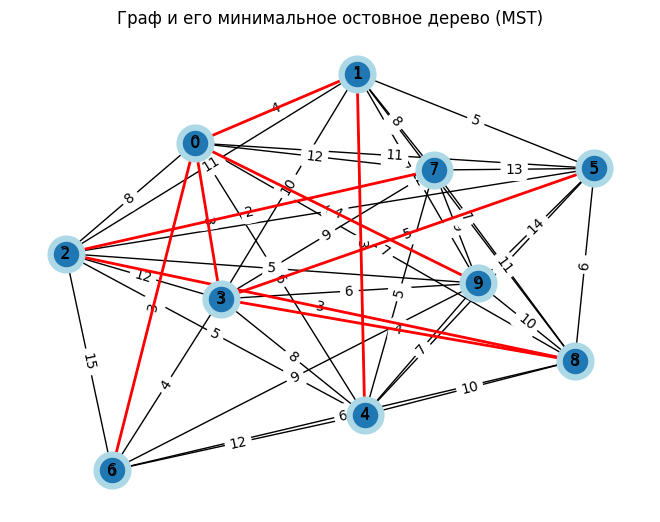

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Загружаем данные
df = pd.read_csv('lab4.csv', delimiter=';')
df.columns = df.columns.str.strip()

# Получаем уникальные города и создаем сопоставление
cities = list(set(df['City 1']).union(set(df['City 2'])))
city_to_index = {city: idx for idx, city in enumerate(cities)}

# Собираем ребра из данных
rebra = []
for index, row in df.iterrows():
    u = city_to_index[row['City 1']]
    v = city_to_index[row['City 2']]
    ves = row['Cost']
    rebra.append((u, v, ves))

kol_vo = len(city_to_index)

# Минимальное остовное дерево (алгоритм Краскала)
bashnya = list(range(kol_vo))
rang = [0] * kol_vo
ostovnye_rebra = []
obshchaya_stoimost = 0

# Сортируем рёбра по стоимости
rebra.sort(key=lambda x: x[2])

for u, v, ves in rebra:
    # Нахождение корня узла
    def nayti(u):
        if bashnya[u] != u:
            bashnya[u] = nayti(bashnya[u])
        return bashnya[u]

    koren_u = nayti(u)
    koren_v = nayti(v)

    # Объединение узлов
    if koren_u != koren_v:
        if rang[koren_u] > rang[koren_v]:
            bashnya[koren_v] = koren_u
        elif rang[koren_u] < rang[koren_v]:
            bashnya[koren_u] = koren_v
        else:
            bashnya[koren_v] = koren_u
            rang[koren_u] += 1

        ostovnye_rebra.append((u, v, ves))
        obshchaya_stoimost += ves

# Вывод информации о минимальном остовном дереве
print("Ребра с минимальной стоимостью:")
for u, v, ves in ostovnye_rebra:
    city_u = list(city_to_index.keys())[u]
    city_v = list(city_to_index.keys())[v]
    print(f"{city_u} - {city_v}, Стоимость: {ves}")
print("Итоговая стоимость:", obshchaya_stoimost)

# Визуализация графа
G = nx.Graph()
G.add_weighted_edges_from(rebra)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=10, font_color='black')
metki_reb = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=metki_reb)

mst = nx.Graph()
mst.add_weighted_edges_from(ostovnye_rebra)
nx.draw(mst, pos, edge_color='red', width=2, with_labels=True)

plt.title("Граф и его минимальное остовное дерево (MST)")
plt.show()


#Задача 5

5. Разработать программу решения задачи о максимальном потоке. Как (т.е. по каким маршрутам) послать максимально возможное количество грузов из начального пункта в конечный пункт, если пропускная способность путей между пунктами ограничена?

##с датасетом

Имена столбцов: ['City 1', 'City 2', 'Cost']
Общий максимальный поток: 16
Поток от City A к City B: 5
Поток от City A к City C: 7
Поток от City A к City D: 4
Поток от City B к City D: 5
Поток от City C к City D: 7


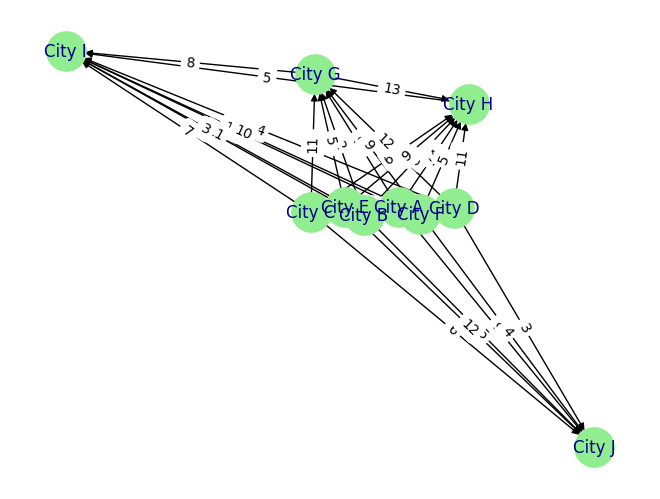

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

dataname = 'lab4.csv'
G = nx.DiGraph()

data = pd.read_csv(dataname, delimiter=';')
print("Имена столбцов:", data.columns.tolist())
data.columns = data.columns.str.strip()

for index, row in data.iterrows():
    G.add_edge(row['City 1'], row['City 2'], capacity=row['Cost'])

istochnik = 'City A'
priznak = 'City D'

potok, slovar_potoka = nx.maximum_flow(G, istochnik, priznak)

print("Общий максимальный поток:", potok)
for u in slovar_potoka:
    for v in slovar_potoka[u]:
        if slovar_potoka[u][v] > 0:
            print(f"Поток от {u} к {v}: {slovar_potoka[u][v]}")

pozitsii = nx.spring_layout(G)
nx.draw(G, pozitsii, with_labels=True, node_color='lightgreen', node_size=800, font_size=12, font_color='darkblue')

metki_reber = nx.get_edge_attributes(G, 'capacity')
nx.draw_networkx_edge_labels(G, pozitsii, edge_labels=metki_reber)

for u, v in slovar_potoka.items():
    for target, potok in v.items():
        if potok > 0:
            metki_reber[(u, target)] = f"{metki_reber[(u, target)]} (P: {potok})"
nx.draw_networkx_edge_labels(G, pozitsii, edge_labels=metki_reber)

plt.grid(True)
plt.show()


#Задача 6

6. Разработать программу решения задачи о назначениях. Имеется некоторое число работ и некоторое число исполнителей. Любой исполнитель может быть назначен на выполнение любой (но только одной) работы, но с неодинаковыми затратами. Нужно распределить работы так, чтобы выполнить их с минимальными затратами.

##с датасетом

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('lab6.csv', sep=";")
dataset = dataset.dropna(axis=1, how='all')
dataset.head()

,Worker,Task,Cost
0,Worker 1,Task 1,15
1,Worker 1,Task 2,20
2,Worker 1,Task 3,25
3,Worker 1,Task 4,30
4,Worker 1,Task 5,18


In [33]:
import pandas as pd
from scipy.optimize import linear_sum_assignment

df = pd.read_csv('lab6.csv', delimiter=';')

df.columns = df.columns.str.strip()

cost_matrix = df.pivot(index='Worker', columns='Task', values='Cost').fillna(float('inf')).values

row_ind, col_ind = linear_sum_assignment(cost_matrix)

min_cost = cost_matrix[row_ind, col_ind].sum()

result = pd.DataFrame({'Worker': df['Worker'].unique()[row_ind], 'Task': df['Task'].unique()[col_ind], 'Cost': cost_matrix[row_ind, col_ind]})
print("\nНазначенные работы:")
print(result)

print("\nМинимальные затраты:", min_cost)


Назначенные работы:
      Worker     Task  Cost
0   Worker 1   Task 6    18
1   Worker 2   Task 4    12
2   Worker 3   Task 2    17
3   Worker 4   Task 1    12
4   Worker 5   Task 3    15
5   Worker 6  Task 10    14
6   Worker 7   Task 9    18
7   Worker 8   Task 8    19
8   Worker 9   Task 7    23
9  Worker 10   Task 5    21

Минимальные затраты: 169


#Задача 7

7. Разработать программу о назначении целей. Найти оптимальное распределение комплекта различного вооружения для поражения целей для нанесения максимального поражения противнику.

##с датасетом

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('lab7.csv', sep=";")
dataset = dataset.dropna(axis=1, how='all')
dataset.head()

,Weapon,Target,Effectiveness
0,Weapon 1,Target 1,85
1,Weapon 1,Target 2,70
2,Weapon 1,Target 3,90
3,Weapon 1,Target 4,50
4,Weapon 1,Target 5,60


Оптимальное распределение:
Вооружение Weapon 1 назначено на цель Target 3 с уроном 89.0
Вооружение Weapon 2 назначено на цель Target 2 с уроном 93.0
Вооружение Weapon 3 назначено на цель Target 5 с уроном 88.0
Вооружение Weapon 4 назначено на цель Target 4 с уроном 92.0
Вооружение Weapon 5 назначено на цель Target 1 с уроном 99.0

Общий максимальный урон: 461.0


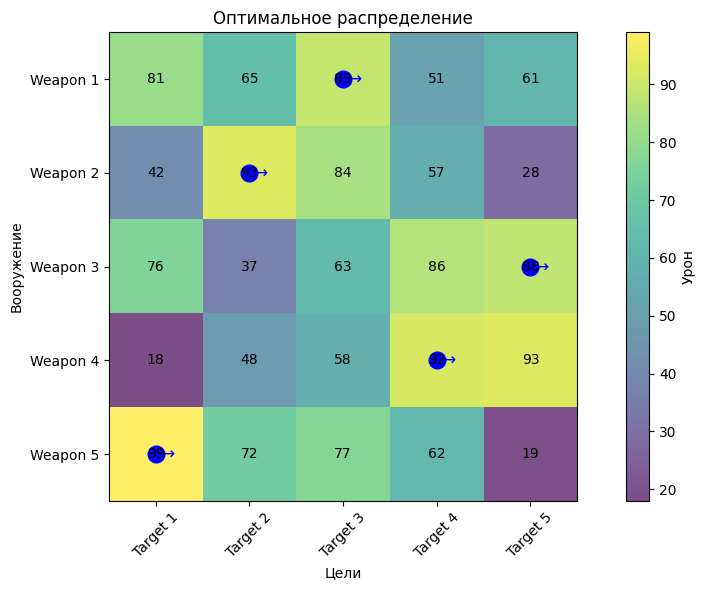

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment

df = pd.read_csv('lab7.csv', sep=';')

weapons = df['Weapon'].unique()
targets = df['Target'].unique()

damage_matrix = np.zeros((len(weapons), len(targets)))

for index, row in df.iterrows():
    weapon_index = np.where(weapons == row['Weapon'])[0][0]
    target_index = np.where(targets == row['Target'])[0][0]
    damage_matrix[weapon_index, target_index] = row['Effectiveness']

cost_matrix = -damage_matrix

row_ind, col_ind = linear_sum_assignment(cost_matrix)

max_damage = damage_matrix[row_ind, col_ind].sum()

print("Оптимальное распределение:")
for r, c in zip(row_ind, col_ind):
    print(f"Вооружение {weapons[r]} назначено на цель {targets[c]} с уроном {damage_matrix[r, c]}")

print(f"\nОбщий максимальный урон: {max_damage}")

plt.figure(figsize=(10, 6))
plt.imshow(damage_matrix, cmap='viridis', alpha=0.7)
plt.colorbar(label='Урон')

for i in range(damage_matrix.shape[0]):
    for j in range(damage_matrix.shape[1]):
        plt.text(j, i, int(damage_matrix[i, j]), ha='center', va='center')

for r, c in zip(row_ind, col_ind):
    plt.plot(c, r, 'bo', markersize=12)
    plt.text(c, r, ' →', color='blue', fontsize=12, ha='left', va='center')

plt.xticks(np.arange(damage_matrix.shape[1]), targets, rotation=45)
plt.yticks(np.arange(damage_matrix.shape[0]), weapons)
plt.title('Оптимальное распределение')
plt.xlabel('Цели')
plt.ylabel('Вооружение')

plt.grid(False)
plt.tight_layout()
plt.show()


#Задача 8

8. Разработать программу решения задачи о загрузке (ранце).
Из заданного множества предметов со свойствами «стоимость» и «вес» требуется отобрать некое число предметов таким образом, чтобы получить максимальную суммарную стоимость при одновременном соблюдении ограничения на суммарный вес.


##с датасетом

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('lab8.csv', sep=";")
dataset = dataset.dropna(axis=1, how='all')
dataset.head()

,Item ID,Cost,Weight
0,1,60,10
1,2,100,20
2,3,120,30
3,4,80,15
4,5,30,5


In [ ]:
import pandas as pd

def ryukzak(vesy, stoimosti, vmeschayemost):
    kolichestvo = len(stoimosti)
    T = [[0 for _ in range(vmeschayemost + 1)] for _ in range(kolichestvo + 1)]

    for i in range(1, kolichestvo + 1):
        for w in range(vmeschayemost + 1):
            if vesy[i - 1] <= w:
                T[i][w] = max(T[i - 1][w], T[i - 1][w - vesy[i - 1]] + stoimosti[i - 1])
            else:
                T[i][w] = T[i - 1][w]

    return T[kolichestvo][vmeschayemost]

if __name__ == "__main__":
    df = pd.read_csv('lab8.csv', sep=';')

    veсhy = df['Weight'].tolist()
    stoimosti = df['Cost'].tolist()

    vmeschayemost = 50

    maksimalnaya_stoimost = ryukzak(veсhy, stoimosti, vmeschayemost)
    print(f"Максимальная стоимость, которую можно получить: {maksimalnaya_stoimost}")


Максимальная стоимость, которую можно получить: 580


In [37]:
import pandas as pd

df = pd.read_csv('lab8.csv', sep=';')
vesy = df['Weight'].tolist()
stoimosti = df['Cost'].tolist()

vmeschayemost = 50 # в этом датасете не было похожего поля, поэтому я добавил его вручную

kolichestvo = len(stoimosti)

T = [[0 for _ in range(vmeschayemost + 1)] for _ in range(kolichestvo + 1)]

for i in range(1, kolichestvo + 1):
    for w in range(vmeschayemost + 1):
        if vesy[i - 1] <= w:
            T[i][w] = max(T[i - 1][w], T[i - 1][w - vesy[i - 1]] + stoimosti[i - 1])
        else:
            T[i][w] = T[i - 1][w]

maksimalnaya_stoimost = T[kolichestvo][vmeschayemost]
print(f"Максимальная стоимость, которую можно получить: {maksimalnaya_stoimost}")


Максимальная стоимость, которую можно получить: 580


#Задача 9

9. Разработать программу решения задачи о кратчайшем пути. Как кратчайшим путем (с наименьшим расходом топлива и времени, т.е. дешевле) попасть из пункта А в пункт Б?

##с датасетом

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('lab9.csv', sep=";")
dataset = dataset.dropna(axis=1, how='all')
dataset.head()

,From,To,Distance,Time
0,A,B,5.0,10.0
1,A,C,10.0,15.0
2,A,D,3.0,5.0
3,B,C,2.0,3.0
4,B,D,4.0,8.0


In [38]:
import heapq
import pandas as pd

df = pd.read_csv('lab9.csv', sep=';')

graf = {}
for index, row in df.iterrows():
    from_node = row['From']
    to_node = row['To']
    distance = row['Distance']
    time = row['Time']

    if from_node not in graf:
        graf[from_node] = {}
    if to_node not in graf:
        graf[to_node] = {}

    graf[from_node][to_node] = (distance, time)
    graf[to_node][from_node] = (distance, time)

nachalnaya_tochka = 'A'
target_node = 'B'

ceny = {uzel: (float('inf'), float('inf')) for uzel in graf}
ceny[nachalnaya_tochka] = (0, 0)
ochered = [(0, 0, nachalnaya_tochka)]

while ochered:
    tekushchaya_stoimost, tekushchee_vremya, tekushchiy_uzel = heapq.heappop(ochered)

    if tekushchaya_stoimost > ceny[tekushchiy_uzel][0] and tekushchee_vremya > ceny[tekushchiy_uzel][1]:
        continue

    for sosed, (dist, vremya) in graf[tekushchiy_uzel].items():
        novaya_stoimost = tekushchaya_stoimost + dist
        novoe_vremya = tekushchee_vremya + vremya

        if (novaya_stoimost < ceny[sosed][0]) or (novaya_stoimost == ceny[sosed][0] and novoe_vremya < ceny[sosed][1]):
            ceny[sosed] = (novaya_stoimost, novoe_vremya)
            heapq.heappush(ochered, (novaya_stoimost, novoe_vremya, sosed))

final_cost, final_time = ceny[target_node]
print(f"Минимальная стоимость от {nachalnaya_tochka} до {target_node}: {final_cost}")
print(f"Минимальное время от {nachalnaya_tochka} до {target_node}: {final_time}")


Минимальная стоимость от A до B: 5.0
Минимальное время от A до B: 10.0


#Задача 10

10. Разработать программу размещения локальной сети. Найти оптимальную конфигурацию прокладки сетевого кабеля и коммутационного оборудования.

##с датасетом

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('lab10.csv', sep=";")
dataset = dataset.dropna(axis=1, how='all')
dataset.head()

,From,To,Distance,Capacity,Type
0,Node 1,Node 2,10,100,Ethernet
1,Node 1,Node 3,15,100,Ethernet
2,Node 2,Node 4,20,50,Fiber optic
3,Node 2,Node 5,25,30,Ethernet
4,Node 3,Node 6,10,100,Ethernet


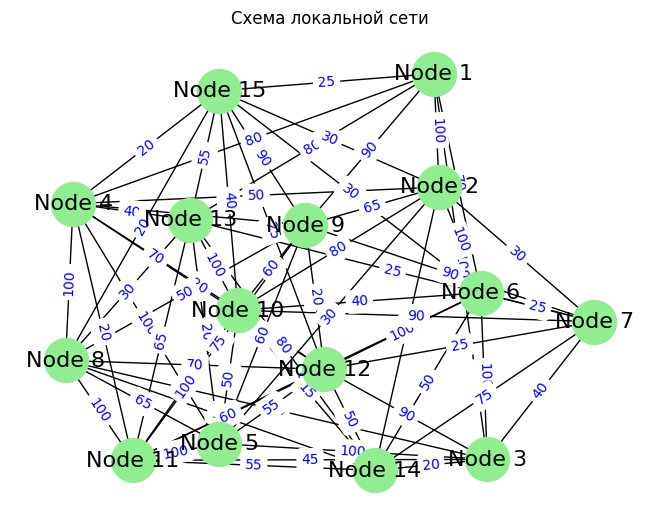

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

svyazi = pd.read_csv('lab10.csv', sep=';')

G = nx.Graph()

for _, row in svyazi.iterrows():
    G.add_node(row['From'])
    G.add_node(row['To'])
    G.add_edge(row['From'], row['To'], ves=row['Capacity'])

pozitsii = nx.spring_layout(G)
nx.draw(G, pozitsii, with_labels=True, node_color='lightgreen', node_size=1000, font_size=16)

metki_reber = nx.get_edge_attributes(G, 'ves')
nx.draw_networkx_edge_labels(G, pozitsii, edge_labels=metki_reber, font_color='blue')

plt.title("Схема локальной сети")
plt.show()
